In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [47]:
mouse_data = os.path.join("data", "mouse_drug_data.csv")
clinical_data = os.path.join("data", "clinicaltrial_data.csv")

mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

merged_df = pd.merge(mouse_df, clinical_df, how="outer", on="Mouse ID")
merged_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [48]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_mean = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumor_mean_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean}).reset_index()
tumor_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [63]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_sem_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_sterror}).reset_index()
tumor_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [64]:
# Minor Data Munging to Re-Format the Data Frames

tumor_sem_df2 = tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_sem_df2

tumor_mean_df2 = tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


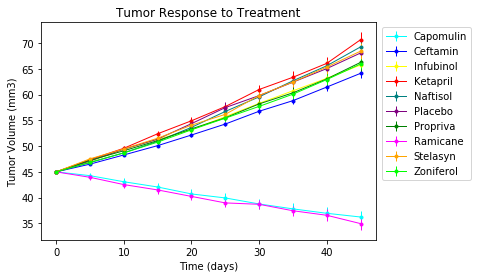

<Figure size 432x288 with 0 Axes>

In [102]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Capomulin"], yerr=tumor_sem_df2["Capomulin"], 
             color="cyan", linewidth=1, marker="o", markersize=3, label="Capomulin")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ceftamin"], yerr=tumor_sem_df2["Ceftamin"], 
             color="b", linewidth=1, marker="o", markersize=3, label="Ceftamin")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Infubinol"], yerr=tumor_sem_df2["Infubinol"], 
             color="yellow", linewidth=1, marker="o", markersize=3, label="Infubinol")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ketapril"], yerr=tumor_sem_df2["Ketapril"], 
             color="r", linewidth=1, marker="o", markersize=3, label="Ketapril")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Naftisol"], yerr=tumor_sem_df2["Naftisol"], 
             color="teal", linewidth=1, marker="o", markersize=3, label="Naftisol")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Placebo"], yerr=tumor_sem_df2["Placebo"], 
             color="purple", linewidth=1, marker="o", markersize=3, label="Placebo")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Propriva"], yerr=tumor_sem_df2["Propriva"], 
             color="g", linewidth=1, marker="o", markersize=3, label="Propriva")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ramicane"], yerr=tumor_sem_df2["Ramicane"], 
             color="magenta", linewidth=1, marker="o", markersize=3, label="Ramicane")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Stelasyn"], yerr=tumor_sem_df2["Stelasyn"], 
             color="orange", linewidth=1, marker="o", markersize=3, label="Stelasyn")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Zoniferol"], yerr=tumor_sem_df2["Zoniferol"], 
             color="lime", linewidth=1, marker="o", markersize=3, label="Zoniferol")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.show()
plt.savefig("Tumor_Response.png")

In [6]:
# potential formulas 

# merged_df["Drug"].value_counts()

# merged_df["Tumor Volume (mm3)"].describe()

# merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].size()

# merged_df.loc[merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# merged_df.loc[(merged_df["Drug"] == "Infubinol")&(merged_df["Mouse ID"] == "q132")]

# merged_df.loc[(merged_df["Drug"] == "Infubinol")&(merged_df["Tumor Volume (mm3)"] < 47)]

# merged_df.sort_values(["Tumor Volume (mm3)", "Drug"], ascending=[0,0])

# Capomulin_err = tumor_sterror_df.loc[(tumor_sterror_df["Drug"]=="Capomulin")]

In [7]:
# filter to a new dataframe example with Placebo and Metastatic size greater than 2

# new_df = merged_df.loc[
#                 (merged_df["Drug"]=="Placebo")&
#                 (merged_df["Metastatic Sites"] > 2)]
# new_d

In [8]:
# these do the same thing but the top one is better for multiword columns 

# merged_df.loc[(merged_df["Drug"] == "Infubinol")]
# merged_df.loc[(merged_df["Drug"] == "Ramicane")]
# merged_df.loc[(merged_df["Drug"] == "Stelasyn")]
# merged_df[merged_df.Drug == "Ketapril"]
# merged_df[merged_df.Drug == "Naftisol"]
# merged_df[merged_df.Drug == "Zoniferol"]
# merged_df[merged_df.Drug == "Placebo"]
# merged_df[merged_df.Drug == "Infubinol"]
# merged_df[merged_df.Drug == "Ceftamin"]
# merged_df[merged_df.Drug == "Propriva"]

In [ ]:
# DATA MUNGING OPTION 

# drug_table = pd.pivot_table(merged_df, 
#                             values=["Tumor Volume (mm3)"], 
#                             index=["Timepoint"], 
#                             columns=["Drug"], 
#                             aggfunc="mean")
# drug_table